## Candlestick Plot

In this lecture, we'll be using another case study to learn about visualizing time-series data. We'll be
particularly focusing on candlestick plot, which is a special bar chart commonly used in trading platform,
foreign exchange, and weather forecasts. 

Candlestick charts originated in Japan during the 1700s when Japanese traders Homma analyzed the 
trade pattern of rice contracts to gain huge profits. His research on so called price pattern recognition was
widely credited and opened the era of global trading in Japan.

![](Candlestick_Intro.png)

Candlestick plot delivers important information for traders given a time period. It shows the opening price,
closing price, highest trading price and lowest trading price of a particular commodity over a time period.
The rectangular portion of the candle is called the **Body**. The lines above and below the Body are called
Upper and Lower Shadow respectively. The Highest Trading Price is marked by the top of the Upper Shadow and
the Lowest trading Price is marked by the bottom of the Lower Shadow. 

Candlestick plot can display various trading patterns like **bullish**, **bearish** and many more. In
particular, the green candle represents the bullish pattern in which the trading price increased over a
certain time period. The bottom of the candle body shows the opening price and the top of the candle body
shows the closing price.

Conversely, the red candle shows the bearish pattern in which the price dropped over a period of time. In
this case the top of the candle body shows the opening price and the bottom of the candle body shows the
closing price.

In case you're curious, there is a great investopedia website which shows you a variery of trading patterns
related to the candlestick plots. * https://www.investopedia.com/trading/candlestick-charting-what-is-it/

There are many possible ways in Python to make candlestick plots, mpl_finance, plotly, finplot are among
some of the most common libraries. We'll focus on using the mpl_finance option.

In [1]:
# Let's bring in pandas as pd as usual
import pandas as pd
# We also import matplotlib.pyplot as plt for making plots
import matplotlib.pyplot as plt

# To get the Python to manipulate how datetime is formatted in the dataset, 
# we need to import the native datetime package
import datetime
# and import matplotlib.dates as mdates as a tool for datetime formatting in graphs
import matplotlib.dates as mdates
# You can see a list of formatting codes at https://matplotlib.org/3.3.2/api/dates_api.html

In [2]:
# Let's import the stock data stock pd.read_csv
# and let's parse the date column into datetime type and put it into index
stock_data = pd.read_csv('assets/stocks.csv', parse_dates = ['Date'], index_col = 1)
# and let's check it out.
stock_data.head()

,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2006-01-03,AAPL,10.678572,10.321428,10.340000,10.678572,201808600.0,9.319328
2006-01-04,AAPL,10.854285,10.642858,10.732857,10.710000,154900900.0,9.346760
2006-01-05,AAPL,10.700000,10.535714,10.690000,10.625714,112355600.0,9.273201
2006-01-06,AAPL,10.957143,10.650000,10.750000,10.900000,176114400.0,9.512576
2006-01-09,AAPL,11.028571,10.820000,10.961429,10.864285,168760200.0,9.481407


In [3]:
# Now there are a few stock companies included in the stock data, so it's a good practice to 
# keep a list of the stock names to make candlestick plot for each stock
stock_list = stock_data['Ticker'].unique().tolist()

# We can run a for loop to look at the stock data more closely
# So for each stock in stock_list
for stock in stock_list:
    # we print out the name, daily trade prices, and trade volume associated with each stock
    print(stock_data.groupby('Ticker').get_group(stock))

# So you'll see there are 2517 opening trading day from 2006 to 2015. For each trading day, 
# the stock price of AAPL, MSFT, IBM, GOOG and an index fund called GSPC are shown in 4 values, 
# namely High, Low, Open and Close. 
# This is really a cool data!


           Ticker        High         Low        Open       Close  \
Date                                                                
2006-01-03   AAPL   10.678572   10.321428   10.340000   10.678572   
2006-01-04   AAPL   10.854285   10.642858   10.732857   10.710000   
2006-01-05   AAPL   10.700000   10.535714   10.690000   10.625714   
2006-01-06   AAPL   10.957143   10.650000   10.750000   10.900000   
2006-01-09   AAPL   11.028571   10.820000   10.961429   10.864285   
...           ...         ...         ...         ...         ...   
2015-12-24   AAPL  109.000000  107.949997  109.000000  108.029999   
2015-12-28   AAPL  107.690002  106.180000  107.589996  106.820000   
2015-12-29   AAPL  109.430000  106.860001  106.959999  108.739998   
2015-12-30   AAPL  108.699997  107.180000  108.580002  107.320000   
2015-12-31   AAPL  107.029999  104.820000  107.010002  105.260002   

                 Volume   Adj Close  
Date                                 
2006-01-03  201808600.0   

In [4]:
# Let's suppose we are interested in understanding when were the stock prices of Apple, 
# Microsoft, IBM, Google and GSPC dropping and recovering over the great recession during 2008 and 2010.

# Let's reflect for a moment on what you know about visualization so far. How would you visualize this data
# to show the bullish (upward) and bearish (downward) trends during the great recession for each of the 5 stocks? 

In [5]:
# So here's my solution. We could first subset the time period to between 
# 2008 and 2010 and overwrite the old data
stock_data = stock_data['2008':'2010']
# and then reset the index
#stock_data.reset_index(inplace = True)
# We can pass through a mapper called date2num to the date column
# to convert the pandas datetime object to a unique numeric identifier for matplotlib
#stock_data['Date'] = stock_data['Date'].map(mdates.date2num)
# If you are curious, you can go back to the website https://matplotlib.org/3.3.2/api/dates_api.html and
# learn about the mapper

In [6]:
# Cool! Next, let's import lines, which is an artistic library for drawing customized line styles, 
# markers, colors and legend handles supported by matplotlib,
import matplotlib.lines as mlines
# and we import the candlestick_ohlc function under mpl_finance package to make candlestick plots
import mplfinance as mpf

Candlestick plot expects the input data such as  
* the date as index,  
* company names as labels,  
* and the ohlc data as values.  
To recap, ohlc is just the short hand of open, high, low and close, values that best
represent time-series trends.

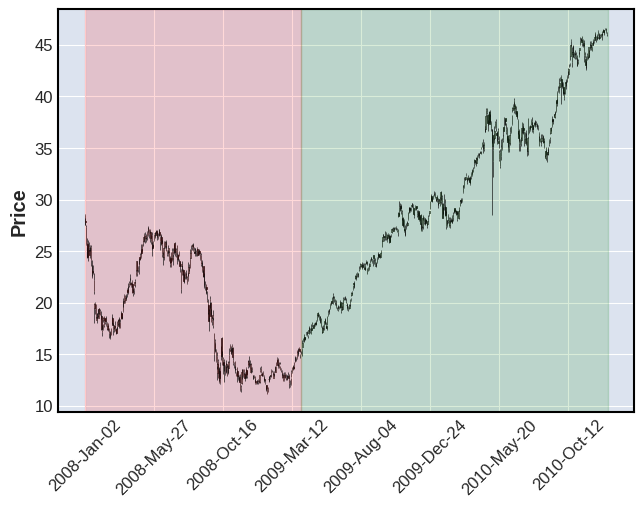

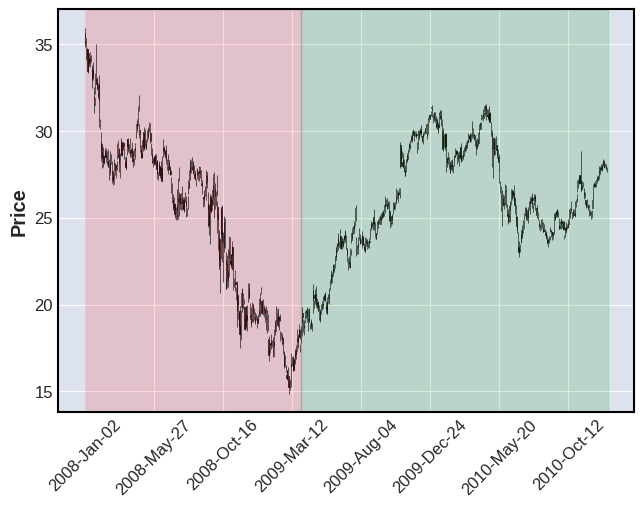

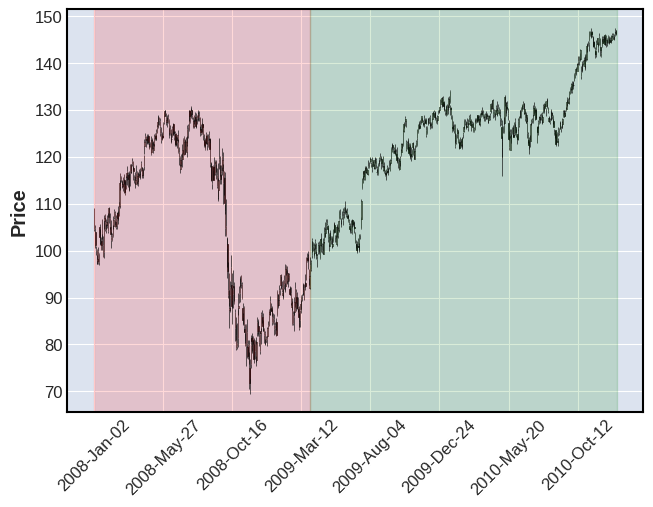

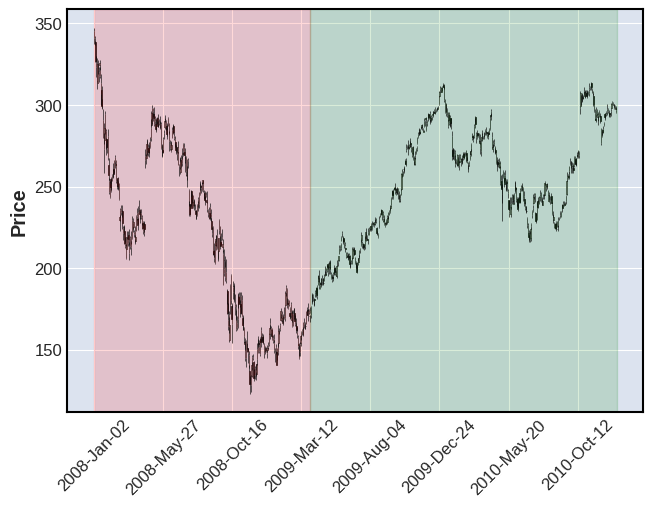

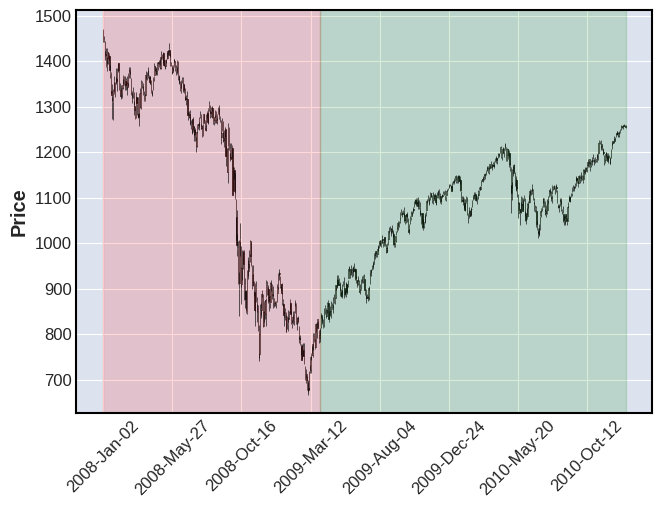

In [9]:
# Let's set up the visualization by creating our fig objects using matplotlib's 
# plt.gcf() (get current figure) function as usual, 

#fig = plt.gcf()
# and I'm gotta set the size of it in inches to 15 by 18
#fig.set_size_inches(15, 18)
fig=None
#Now let's iterate over the list of stocks and create a side-by-side figure for each of the 5 companies. 
for i in range(len(stock_list)):
    # So stock_group will save a copy of the stock data splitted by company
    stock_group = stock_data.groupby('Ticker').get_group(stock_list[i])
    #print(stock_group.index.dtype)
    # and we'll make a new subplot for each company
    #ax = fig.add_subplot(5, 1, i+1)

    # Next, let's pull out the date and ohlc data used for candlestick plots as a list. 
    columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    # Cool! Now we'll use the candlestick_ohlc function (which is under the mpl_finance package)
    # We pass through the ax object, and provide the plot with the date, and ohlc trade prices values
    
    # It's great to adjust the width and colors of the "candles" so I set width equals 0.5 and 
    # use a green candle (as colorup) to show each bullish trading day and 
    # a red candle (as colordown) for each bearish trading day
    
    #############################
    
    # When we plot the financial data, a number of parameters are available to us. The first one is the
    # DataFrame which holds our open, high, low, close, and optionally volume columns. These columns need
    # to be named exactly for the mplfinance library to plot them appropriate. The second parameter we'll
    # use is called type, and there are a couple of different common finance plot types but I'll use the
    # word candle here so that we get a candlestick chart. Finally, since we want to highlight and annote
    # on the figure itself, we want to set the returnfig parameter to True. This tells the mplfinance library
    # to return to us two parameters, the first being the figure object and the second being a collection
    # of actors. We're actually not interested in that second item, so we'll assign it to the underscore
    # variable. There's nothing special about the underscore here, it's just another variable, but it's
    # common practice (even called "pythonic") to assign throw away values which come back to an underscore
    fig,_=mpf.plot(stock_group[columns], type = 'candle', returnfig=True)

    # Now that the figure has been created, we want to highlight the decline of stocks (January 08-March 09)
    # in read, and the rise of stocks (April 09-January 11) in green. This is tricky! It's where our
    # knowledge of matplotlib internals comes in handy, as the developer of the mplfinance library is doing
    # some tricky things. See, the image which is displayed is actually two dimensional with floating point
    # values representing the candles. The XAxis is actually of the range of 0 through the length of our
    # stock data. This means the first day of data is represented at x=0, the second day at x=1, and so forth.
    # This is done intentionally, because some days the markets are closed (e.g. holidays, weekends), and
    # the author didn't want these to appear as gaps. This means that if we want to take an arbitrary date
    # and reference it in the image, we need to change the date into an integer based on our dataset!
    
    # Let's make a little function to help us with this. I'll call it date_to_index, and it will take our
    # dataframe index to search through - remember this is a datetime index! - and find the right integer
    # insertion point from a string
    def date_to_index( indicies, date ):
        # we'll want numpy for this
        import numpy as np
        # now numpy has a really nice function to binary search through a sorted list, which our index is,
        # called searchsorted. It returns a new insertion order which is exactly what we want!
        return np.searchsorted( indicies, pd.to_datetime(date) )
    
    # now we can just set up a couple of regions for highlighting on the figure, first the decline
    declineregion={"start":date_to_index(stock_group.index,'2008-01-01'),
                   "end":date_to_index(stock_group.index,'2009-03-31')}    
    # now the revival
    revivalregion={"start":date_to_index(stock_group.index,'2009-03-31'),
                   "end":date_to_index(stock_group.index,'2011-1-1')}
    
    # now we just need to plot them! Since the figure was returned to us, we can pull the Axes object out
    # using the axes attribute
    axis=fig.axes[0]
    # now we just render our decline region using axvspan
    axis.axvspan(declineregion["start"], declineregion["end"], color='red', alpha=0.15)
    # and now the revival
    axis.axvspan(revivalregion["start"], revivalregion["end"], color='green', alpha=0.15)

    
    
    
    #############################
    
    # Sets up x-axis ticks and labels that treat the x data as dates.
    #ax.xaxis_date()
    
    # Let's create a legend which has a blue star logo representing the name of each stock
#     blue_star = mlines.Line2D([], [], color = 'blue', marker = '*',
#                                markersize = 15, label = stock_list[i])
#     # and use the handles option to show the blue star in the legend and set the legend at the lower right corner
#     plt.legend(handles = [blue_star], loc='lower right')
    

    #ax.axvspan(mdates.date2num(datetime.datetime(2008,1,1)), mdates.date2num(datetime.datetime(2009,3,31)), color='red', alpha=0.15)
    #ax.axvspan(mdates.date2num(datetime.datetime(2009,3,31)), mdates.date2num(datetime.datetime(2011,1,1)), color='green', alpha=0.15)
    
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
    # and set the x and y axis labels be Date and price respectively
    #plt.xlabel("Date")
    #plt.ylabel("Stock Price")
    # and show the graph
    #print(ax.xaxis)
#plt.show()
# matplotlib.axis.Axis.get_view_interval
#print(plt.gca().xaxis.get_view_interval())


Cool! You can understand the direction the stock price movement during the 3-year great recession by
observing the color and positioning of the candlesticks. When a candlestick is green, the price moves
upward; when a candlestick is red, the price moves downward. 

And here's my observation. Since a majority of the candles are red from January 2008 to March 2009 in all 5
subplots, we can see the overall downward pattern, which means the stock prices for all of the 5 firms
plummetted from the beginning of 2008 to the end of the first quarter of 2009. Since most candles are green
starting from the second quarter of 2009, we can see the overall upward pattern, which means the stock prices
for all 5 firms went up. Despite the upward trend for over a year, among the 5 stocks, only Apple and IBM
recovered the loss in stock prices by the end of the 2010, while the rest of the three companies did not
recover from the stock price deficits and still traded lower than the beginning of 2008 at the end of the
year 2010. It's also worth notice that the size of the candles also offers important information regarding
the steepness of price change, which I will invite you to make your own interpretations.

In [ ]:
# If you are interested about making our own comical info-graphics, you can specify your own 
# xkcd-style plot by wrapping your plotting code with the with plt.xkcd() statement
with plt.xkcd():
    # So we'll just copy across all of our plotting information and pass through the xkcd formatting filter 
    fig = plt.gcf()
    fig.set_size_inches(15, 18)

    for i in range(len(stock_list)):
        stock_group = stock_data.groupby('Ticker').get_group(stock_list[i])
        ax = fig.add_subplot(5, 1, i+1)
        columns = ['Date', 'Open', 'High', 'Low', 'Close']
        candlestick_ohlc(ax,
                         stock_group[columns].values,
                         width = 1,
                         colorup = 'g',
                         colordown = 'r')
        ax.xaxis_date()
        blue_star = mlines.Line2D([], [], color = 'blue', marker = '*',
                                   markersize = 15, label = stock_list[i])
        plt.legend(handles = [blue_star], loc='lower right')
        plt.axvspan('2008-01', '2009-03', color='red', alpha=0.15)
        plt.axvspan('2009-03', '2011-01', color='green', alpha=0.15)
        plt.xlabel("Date")
        plt.ylabel("Price")

Well, admittedly I could barely see the very very thin candlesticks in the comical mode this time. So for
those of you who really love comical visualization, it's your turn to play around with the codes and come up
with ways to improve the quality of the chart. But the bottom line is a realization that xkcd is not always
able to make nicer looking graphs.

In this lecture, I introduced you to visualize time-series data using candlestick plots, which has a number
of important use cases for recognizing trade patterns. We particularly went through some useful matplotlib
tricks such as mdates and mlines. You don't have to use all these for your assignments. I actually applied
quite a bit myself out of the curiosity of understanding precipitation and solar level in my hometown Macau.
So it's useful to take time practicing how to create stylish graphs, annotations in graphical visualizations
since it's a pretty powerful way to interact with data and to interact with others as data scientists.